In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import streamlit as st
from sklearn.cluster import AgglomerativeClustering

In [3]:
animal_class = pd.read_csv("animals_data\class.csv") # this is the actual division
zoo = pd.read_csv("animals_data\zoo.csv") # data we should work on 

In [4]:
zoo.dtypes.values

array([dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64')], dtype=object)

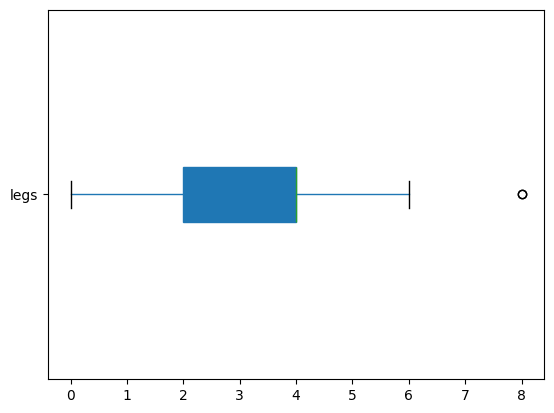

In [5]:

columns = zoo.columns 
""" columns are:
'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type' """

plot = zoo.boxplot("legs", grid = False, vert = False, patch_artist = True )
plt.show()




In [6]:
legs_count = zoo['legs'].value_counts().to_dict()
legs_count

{4: 38, 2: 27, 0: 23, 6: 10, 8: 2, 5: 1}

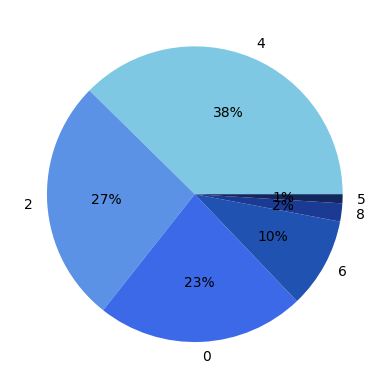

In [7]:
plt.pie(legs_count.values(), labels = legs_count.keys(), autopct= '%1.0f%%',
        colors = ["#7EC8E3", 
                  "#5B92E5", 
                  "#3C69E7", 
                  "#2052B2", 
                  "#1B3A93", 
                  "#12275E"]
)
plt.show()

In [8]:
def percentage(column_name):
    percent = int(zoo[column_name].sum()) / 101 
    return percent

percentage("feathers")

0.19801980198019803

In [9]:
type(len(zoo["feathers"]))

int

In [10]:
columns = columns.drop(['animal_name','legs', 'class_type'])


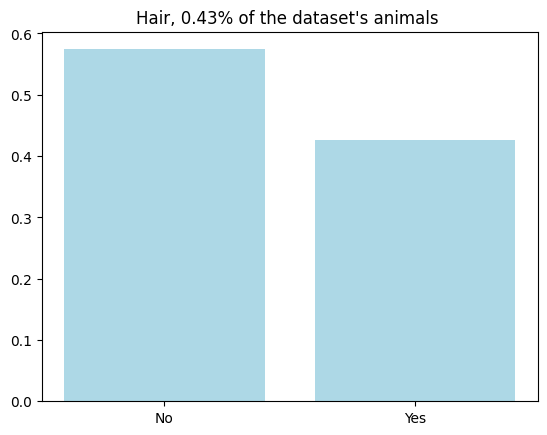

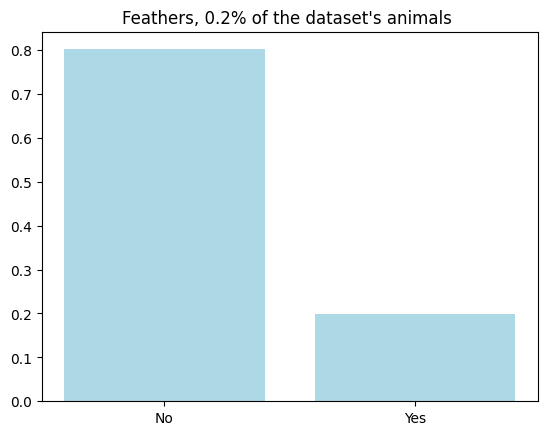

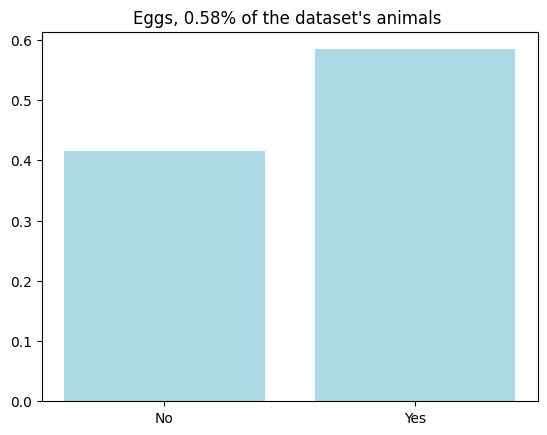

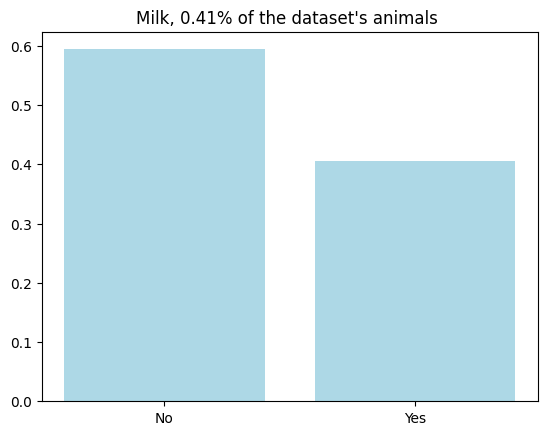

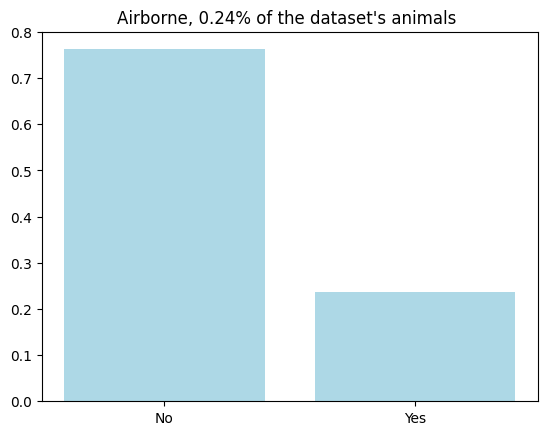

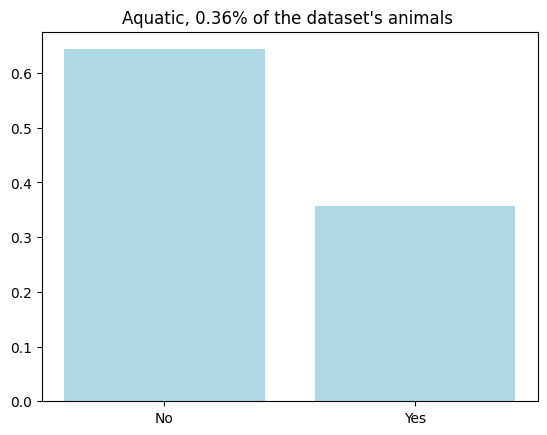

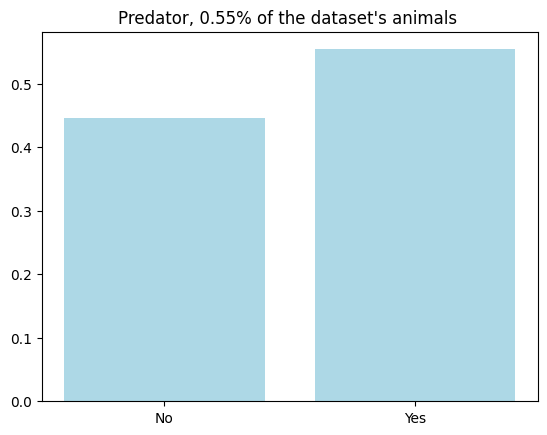

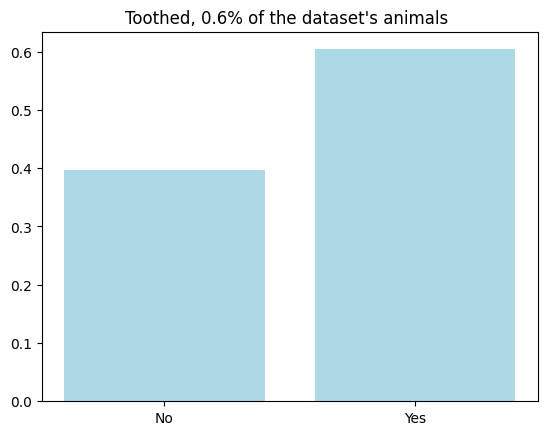

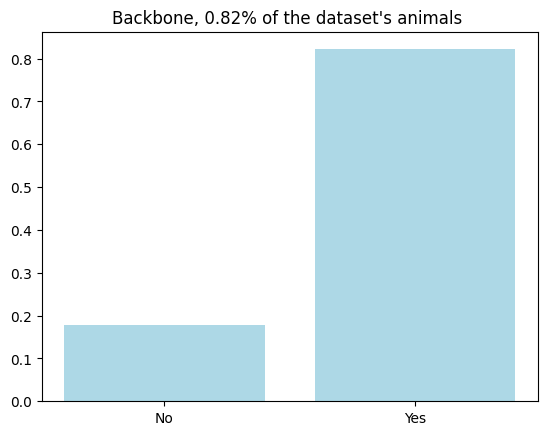

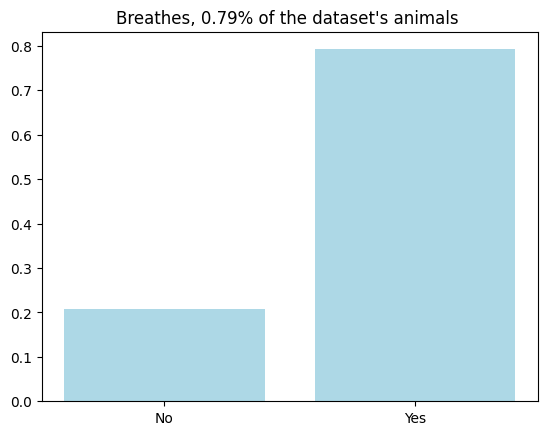

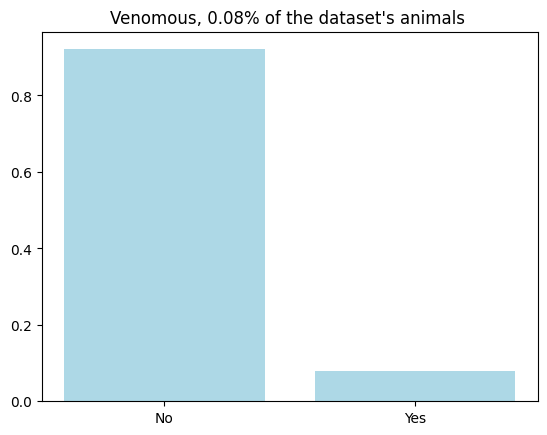

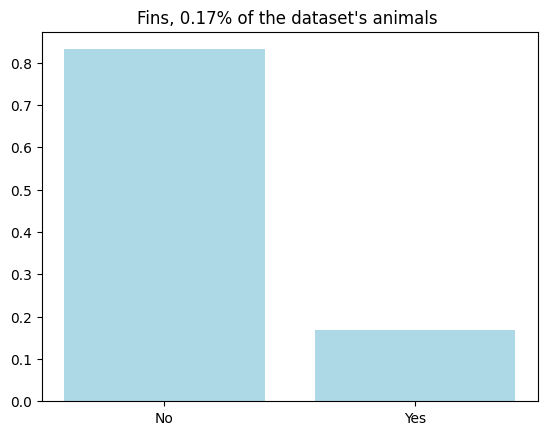

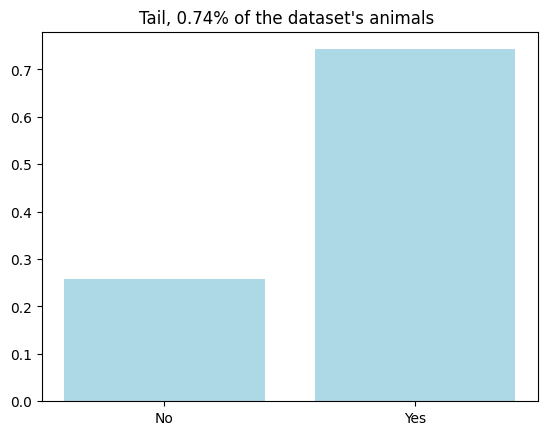

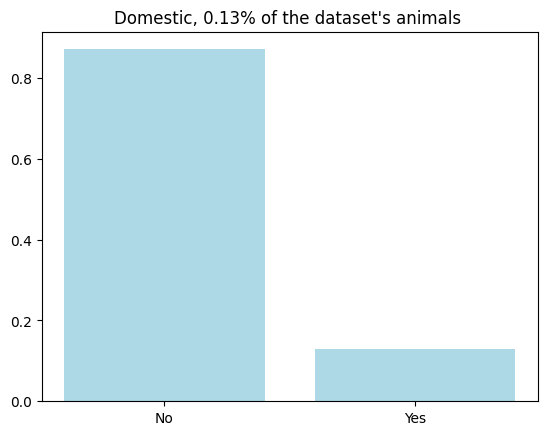

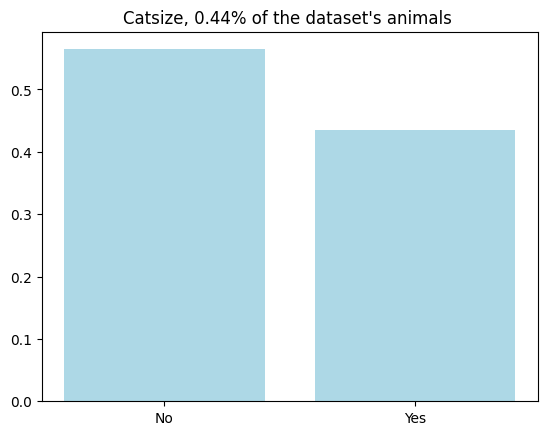

In [11]:
for element in columns:
    perc = percentage(element)
    plot = plt.bar(["No","Yes"],[1-perc, perc], color = 'lightblue' )
    plt.title(f"{element.capitalize()}, {round(perc, 2)}% of the dataset's animals ")
    plt.show()


Let's see in our dataset, how many catsize animals are domestic.

In [12]:
mask = zoo['catsize'] == True
len(zoo[mask])

44

In [13]:
zoo[~mask].head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2


In [14]:
cat_dom = zoo[mask][zoo.domestic == True] #df of both catsize and domestic animals

per_cat_dom = len(zoo[mask][zoo.domestic == True])/len(zoo[mask]) # % of domestic animals among the cat size ones
per_cat_dom

C:\Users\aless\AppData\Local\Temp\ipykernel_22316\1640745969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat_dom = zoo[mask][zoo.domestic == True] #df of both catsize and domestic animals
C:\Users\aless\AppData\Local\Temp\ipykernel_22316\1640745969.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  per_cat_dom = len(zoo[mask][zoo.domestic == True])/len(zoo[mask]) # % of domestic animals among the cat size ones


0.13636363636363635

So the 13% of the dataset refers to domestic animals and almost the 14% of the catsize animals are domestic.
Let's see among non cat size animals, we expect to have a lower percentage.


In [15]:
non_cat_dom = zoo[~mask][zoo.domestic == True]
per_non_cat_dom = len(non_cat_dom)/len(zoo[~mask])
per_non_cat_dom

C:\Users\aless\AppData\Local\Temp\ipykernel_22316\3540892945.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_cat_dom = zoo[~mask][zoo.domestic == True]


0.12280701754385964

The 8 per cent of the animals are venomous, let's see among the zero legged ones

In [16]:
mask1 = zoo['legs']== 0
len(zoo[mask1][zoo.venomous == True])/len(zoo[mask1])

C:\Users\aless\AppData\Local\Temp\ipykernel_22316\282551265.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(zoo[mask1][zoo.venomous == True])/len(zoo[mask1])


0.17391304347826086

Among the zero legged ones, the venomous ones are the 17.39%

### Let's build the classification models:


In [17]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
zoo_columns = zoo.columns
zoo_columns = zoo_columns.drop(['class_type', 'animal_name'])
df = zoo[zoo_columns] # we call df what we are going to use for the clustering algorithm
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Creazione del modello:

Agglomerative clustering is the type of hierarchical clustering that creates clusters starting from the bottom and going up.At the start, each data point has its own cluster, the process ends when we reach the requested number of clusters, 7 in our case.

The parameters of the agglomerative clustering we are interested in, are:
- n_clusters: specifies the number of clusters wanted
-   linkage: specifies the linkage criteria:
    - __ward__: minimizes the variance of the clusters being merged (__default__)
    - __average__: uses the average of the distances of each observation of the two sets
    - __complete__: uses the maximum distances between all observations of the two sets
    - __single__: uses the minimum of the distances of betewwn all observation of the two sets

Let's try them all:  


In [19]:
clustering_ward = AgglomerativeClustering(n_clusters= 7)
clustering_avg = AgglomerativeClustering(n_clusters= 7, linkage='average')
clustering_cmpl = AgglomerativeClustering(n_clusters= 7, linkage='complete')
clustering_sngl = AgglomerativeClustering(n_clusters= 7, linkage='single')

## Addestramento del modello

In [20]:
clustering_ward.fit(df)
clustering_avg.fit(df)
clustering_cmpl.fit(df)
clustering_sngl.fit(df)

AgglomerativeClustering(linkage='single', n_clusters=7)

In [21]:
# to see how many times does each value appear
zoo['class_type'].value_counts().sort_values()

class_type
5     4
3     5
6     8
7    10
4    13
2    20
1    41
Name: count, dtype: int64

In [22]:
# etichette del cluster
ward = clustering_ward.labels_ 
average = clustering_avg.labels_ 
single = clustering_sngl.labels_ 
complete = clustering_cmpl.labels_ 
zoo['class_type'] = zoo['class_type'] - 1
zoo['ward'] = ward
zoo['average'] = average
zoo['single'] = single
zoo['complete'] = complete
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,ward,average,single,complete
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,0,1,1,6,1
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,0,1,1,6,1
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,3,2,2,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,0,1,1,6,1
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,0,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,0,4,5,2,2
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,5,0,4,6,5
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,0,1,1,6,1
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,6,6,6,1,0


Now that we have the different divisions, we need to visualize how well did we do.

In [23]:
print(f"Actual labels: {zoo['class_type'].value_counts().sort_values()}")
print(f"Ward labels: {zoo['ward'].value_counts().sort_values()}")
print(f"Actual labels: {zoo['average'].value_counts().sort_values()}")
print(f"Actual labels: {zoo['single'].value_counts().sort_values()}")
print(f"Actual labels: {zoo['complete'].value_counts().sort_values()}")

Actual labels: class_type
4     4
2     5
5     8
6    10
3    13
1    20
0    41
Name: count, dtype: int64
Ward labels: ward
5     7
4     7
6     7
0    14
2    16
3    20
1    30
Name: count, dtype: int64
Actual labels: average
0     2
6     4
5     7
4    12
2    19
3    20
1    37
Name: count, dtype: int64
Actual labels: single
3     1
5     1
1     4
2     7
0    19
4    20
6    49
Name: count, dtype: int64
Actual labels: complete
3     2
6     4
2     7
5     8
4    20
0    23
1    37
Name: count, dtype: int64


The approach above doesn't really tell much on how accurate we have been. We can use the confusion matrix to confront predicted and actual values:

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

We sorted the confusion matrix by taking the index of the sorted list of value counts so that a greater index refers to the actual class with more observations. This method doesn't ensure that we are talking about the same class but is an effort towards that goal.

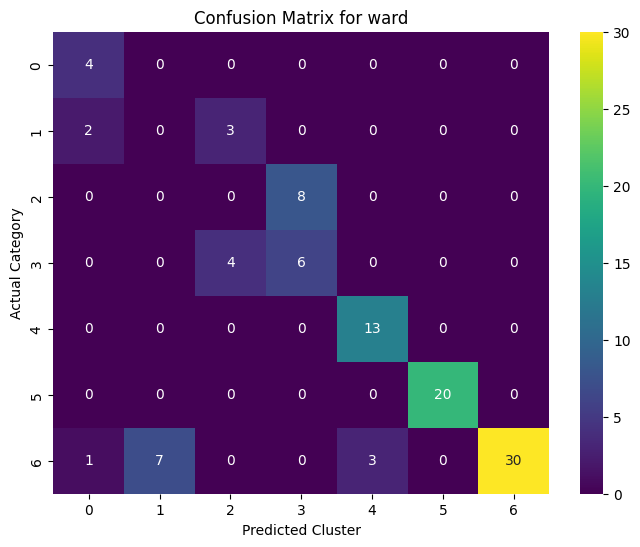

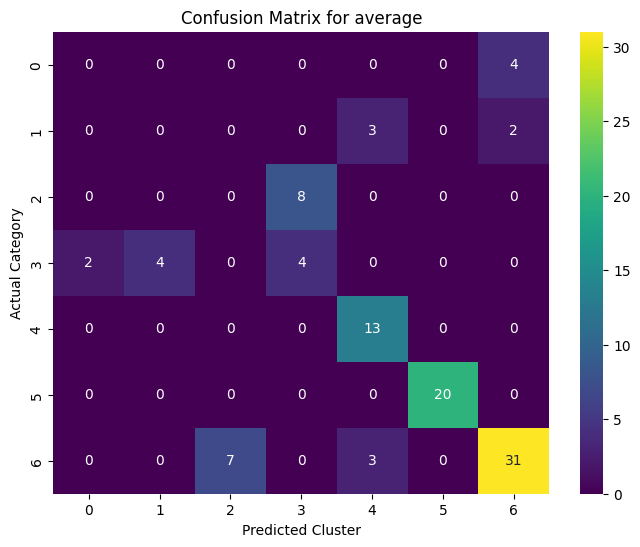

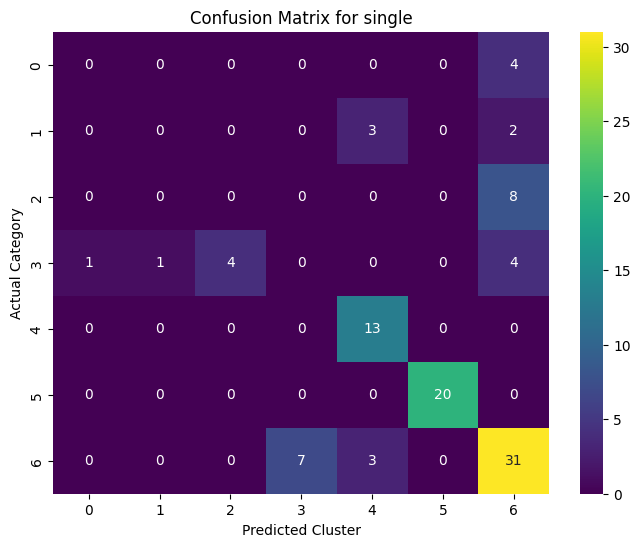

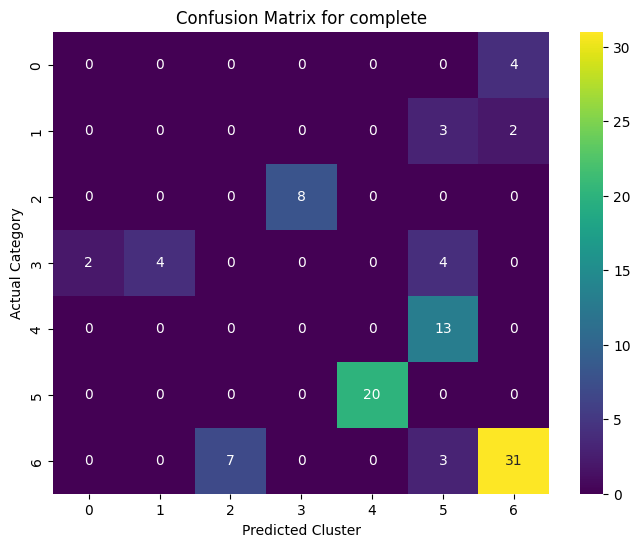

In [25]:

predicted_columns = ['ward', 'average', 'single', 'complete']
# Assuming 'actual' is the column with the actual values and 'cluster_method1' is one of the clustering columns
for col in predicted_columns:
    cm = confusion_matrix(zoo['class_type'], zoo[col])
    cm_sorted = cm[np.ix_(zoo['class_type'].value_counts().sort_values().index, zoo[col].value_counts().sort_values().index )]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_sorted, annot=True, fmt='d', cmap='viridis')  #  annot = True means that we are annotating the results inside the cells,
    # fmt = d indicates the format that is decimals, cmap = viridis indicates the color of the cm
    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted Cluster')
    plt.ylabel('Actual Category')
    plt.show()


Then we can use a dendogram to visualize the division in clusters:

In [26]:
from scipy.cluster import hierarchy 

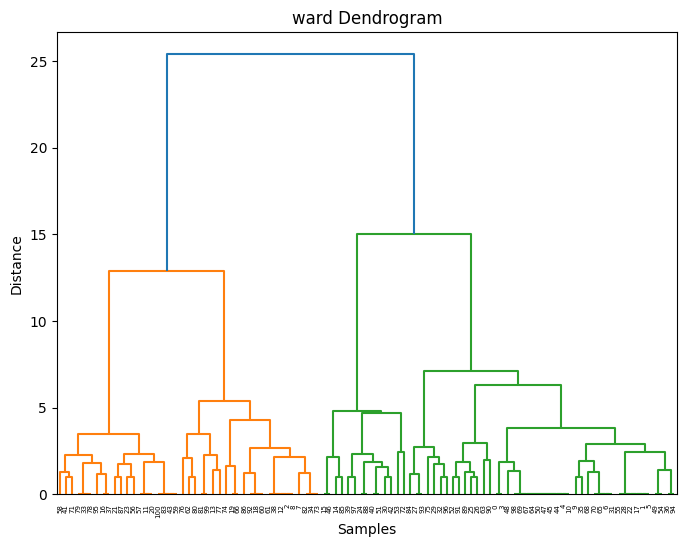

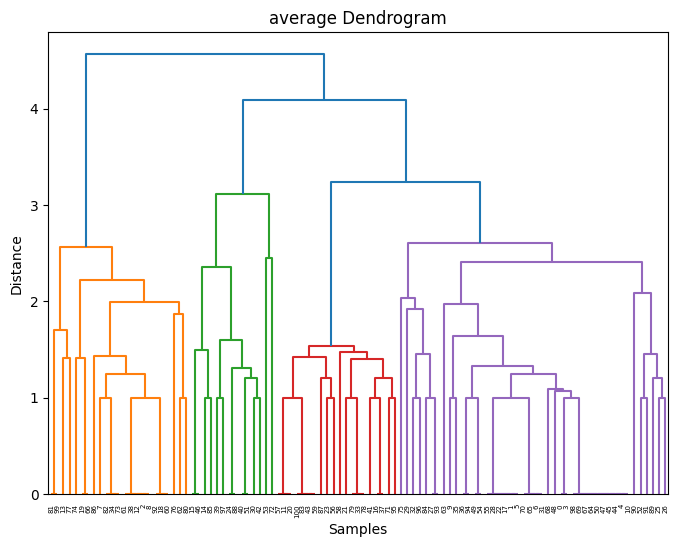

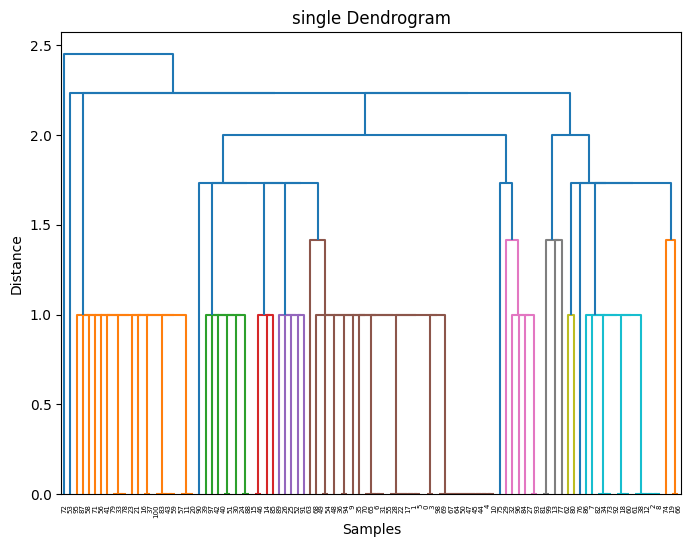

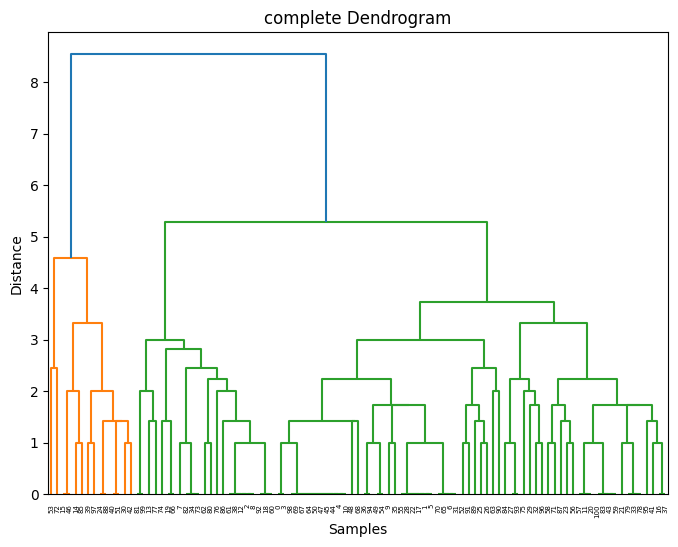

In [27]:
for col in predicted_columns:
    link = hierarchy.linkage(df, method= col) # Use linkage method to construct the matrix of dendogram connections
    plt.figure(figsize=(8, 6))
    hierarchy.dendrogram(link) 
    plt.title(f'{col} Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

### PCA + clustering
Since none of the hierarchical clusterings provided the results we expected, let's try with applying the __pricnipal component analysis__ and the __clustering__ on the principal components. The goal of the PCA is to transform the set of correlated variables in a non-correlated variables set.
To apply PCA we need to:
    1. Compute the __covariance matrix__ 
    2. Compute __egenvalues__ and __eigenvectors__ to understand the direction of the principal components and their strength (eigenvalues)
    3. Create the __components__
These three steps are automatically performed by scikit learn when applying pca.

In [28]:
from sklearn.decomposition import PCA

In [49]:
# compute the covariance matrix:
pca = PCA(12)
pc = pca.fit_transform(df)
pc.shape

(101, 12)

Now that we have the components

In [50]:
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
explained_variance_cumulative

array([0.62561548, 0.77058453, 0.84311622, 0.88220158, 0.90745871,
       0.92872992, 0.9436424 , 0.9573301 , 0.96795847, 0.97754865,
       0.98571626, 0.99110607])

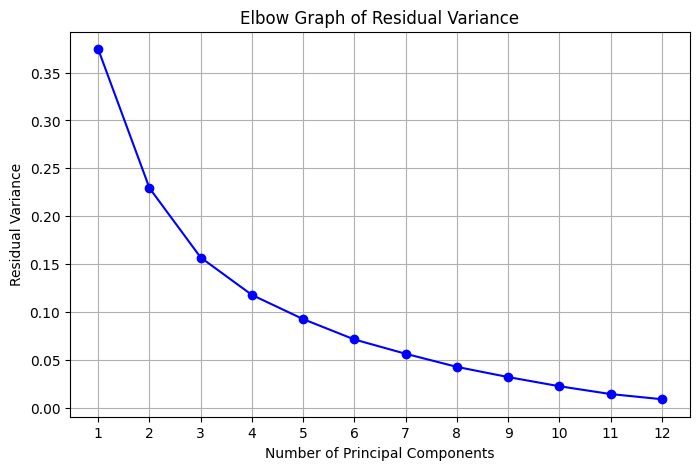

In [51]:
# Calcola la varianza residua (1 - varianza spiegata cumulativa)
residual_variance = 1 - explained_variance_cumulative

# Grafico della varianza residua all'aumentare del numero di componenti principali
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(residual_variance) + 1), residual_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Residual Variance')
plt.title('Elbow Graph of Residual Variance')
plt.xticks(range(1, len(residual_variance) + 1))
plt.grid(True)
plt.show()

Since we don't have any data, we can use all the 12 components to make the clustering.

In [40]:
from sklearn.cluster import KMeans

In [55]:
k_means = KMeans(n_clusters= 7, random_state= 42).fit(pc)

In [53]:
k_means.labels_

array([5, 2, 1, 5, 5, 2, 2, 1, 1, 2, 5, 3, 1, 1, 4, 0, 3, 2, 6, 6, 3, 3,
       2, 3, 0, 4, 4, 2, 2, 2, 0, 2, 2, 3, 1, 2, 2, 3, 1, 0, 0, 3, 0, 3,
       5, 5, 0, 5, 5, 5, 5, 0, 4, 0, 5, 2, 3, 3, 3, 3, 6, 1, 1, 5, 5, 2,
       6, 5, 5, 5, 2, 3, 0, 1, 6, 6, 1, 1, 3, 3, 1, 1, 1, 3, 2, 0, 1, 3,
       0, 4, 4, 4, 6, 2, 2, 3, 2, 0, 5, 1, 3], dtype=int32)

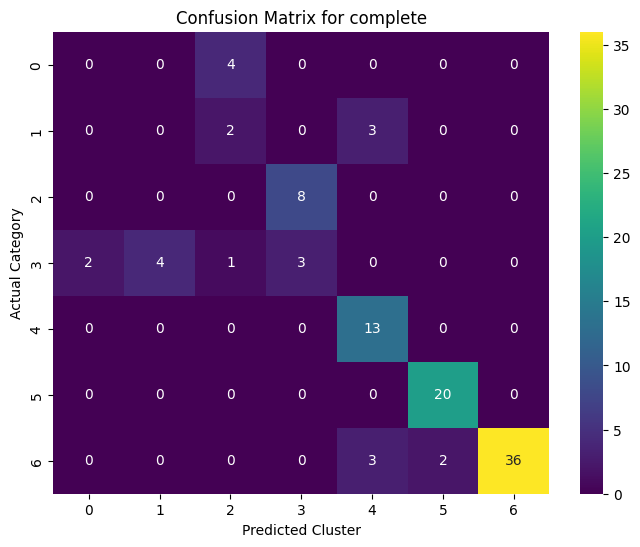

In [56]:

cm = confusion_matrix(zoo['class_type'], k_means.labels_)
cm_sorted = cm[np.ix_(zoo['class_type'].value_counts().sort_values().index, pd.Series(k_means.labels_).value_counts().sort_values().index )]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sorted, annot=True, fmt='d', cmap='viridis')  #  annot = True means that we are annotating the results inside the cells,
# fmt = d indicates the format that is decimals, cmap = viridis indicates the color of the cm
plt.title(f'Confusion Matrix for {col}')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Category')
plt.show()